**Умова:**

При вивченні випадкової величини Х у результаті 40 незалежних спостережень дістали вибірку: 10, 13, 10, 9, 9, 12, 12,
6, 7, 9, 8, 9, 11, 9, 14, 13, 9, 8, 8, 7, 10, 10, 11, 11, 11, 12, 8, 7, 9, 10, 14, 13, 8, 8, 9, 10, 11, 11, 12, 12.
Побудувати дискретний статистичний розподіл для цієї вибірки, а також полігон частот і F*(x). Знайти моду та
медіану.


**Розв'язок:**

**1. Побудуємо дискретний статистчичний розподіл вибірки.**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

sample_line = [10, 13, 10, 9, 9, 12, 12, 6, 7, 9, 8, 9, 11, 9, 14, 13, 9, 8, 8, 7, 10,
        10, 11, 11, 11, 12, 8, 7, 9, 10, 14, 13, 8, 8, 9, 10, 11, 11, 12, 12]

s = pd.Series(sample_line)
df = pd.DataFrame(s.value_counts(), columns = ["m"])
df = df.sort_index()
df = df.rename_axis('x').reset_index()
df


,x,m
0,6,1
1,7,3
2,8,6
3,9,8
4,10,6
5,11,6
6,12,5
7,13,3
8,14,2


Зобразимо статистичний розподіл у більш наглядному вигляді:

| x     | 6      | 7      | 8      | 9      | 10     | 11     | 12     | 13     | 14   |
| :---  | :----: | :----: | :----: | :----: | :----: | :----: | :----: | :----: | ---: |
| **m** | 1      | 3      | 6      | 8      | 6      | 6      | 5      | 3      | 2    |        
    
    

    
де ${х_і}$ - значення варіанта, а ${m_i}$ - значення абсолютної частоти для даного варіанта

**2. Побудуємо полігон частот для даної вибірки.**

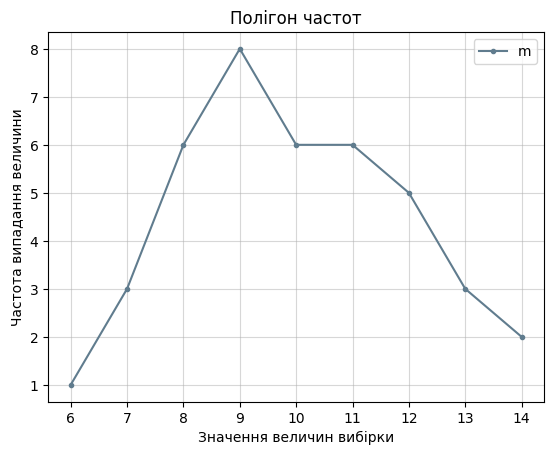

In [2]:
df.plot(x="x", y="m", kind="line", fontsize=10, color='#607c8e', style=".-")
plt.title('Полігон частот')
plt.xlabel('Значення величин вибірки')
plt.ylabel('Частота випадання величини')
plt.grid(axis='y', alpha=0.5)
plt.grid(axis='x', alpha=0.5)
plt.show()


**3. Побудуємо вибіркову функцію розподілу.**

3.1. Додамо колонку розподілу відносних частот:

In [3]:
df['w'] = [i/df['m'].sum() for i in df['m']]
df

,x,m,w
0,6,1,0.025
1,7,3,0.075
2,8,6,0.150
3,9,8,0.200
4,10,6,0.150
5,11,6,0.150
6,12,5,0.125
7,13,3,0.075
8,14,2,0.050


3.2. Додамо колонку з відносним розподілом:

In [4]:
df['c_w'] = df['w'].cumsum()
df

,x,m,w,c_w
0,6,1,0.025,0.025
1,7,3,0.075,0.100
2,8,6,0.150,0.250
3,9,8,0.200,0.450
4,10,6,0.150,0.600
5,11,6,0.150,0.750
6,12,5,0.125,0.875
7,13,3,0.075,0.950
8,14,2,0.050,1.000


3.3. Побудуємо графік F*(x):

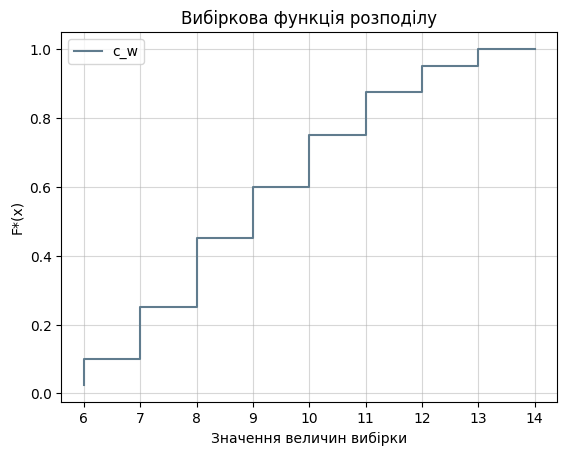

In [5]:
df.plot(x="x", y="c_w", kind="line", drawstyle="steps", fontsize=10, color='#607c8e')
plt.title('Вибіркова функція розподілу')
plt.xlabel('Значення величин вибірки')
plt.ylabel('F*(x)')
plt.grid(axis='y', alpha=0.5)
plt.grid(axis='x', alpha=0.5)
plt.show()

**4. Знайдемо моду та медіану даної вибірки.**

In [6]:
median = df['x'].median()
print("Медіана даної вибірки = ", median)

Медіана даної вибірки =  10.0


In [7]:
moda = float(df['x'][df['m'] == df['m'].max()])
print("Мода даної вибірки = ", moda)

Мода даної вибірки =  9.0
